In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.cluster import AffinityPropagation
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('~/EPITECH/TEK5/Data-tests/KaDo.csv')

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.columns

Index(['TICKET_ID', 'MOIS_VENTE', 'PRIX_NET', 'FAMILLE', 'UNIVERS', 'MAILLE',
       'LIBELLE', 'CLI_ID'],
      dtype='object')

In [5]:
df["CLI_ID"] = df["CLI_ID"].astype(str)
df["TICKET_ID"] = df["TICKET_ID"].astype(str)

In [6]:
to_drop = ['PRIX_NET', 'MOIS_VENTE', 'CLI_ID', 'FAMILLE', 'UNIVERS', 'MAILLE']
df.drop(to_drop, inplace=True, axis=1)

In [7]:
train, validate, test = np.split(df.sample(frac=1, random_state=42), [int(.01*len(df)), int(.8*len(df))])

In [8]:
train.size

144910

In [9]:
categories = [col for col in train.columns if train[col].dtypes == 'O']
categories

['FAMILLE', 'CLI_ID']

In [10]:
ohe = OneHotEncoder(sparse=False, drop='first')

In [11]:
train_encoded = pd.DataFrame(ohe.fit_transform(train[categories]), columns=ohe.get_feature_names(), index=train.index)

In [12]:
train_data = pd.concat([train_encoded, train.drop(categories, axis=1)], axis=1)

In [15]:
train_data

x0_HYGIENE  x0_MAQUILLAGE  x0_MULTI FAMILLES  x0_PARFUMAGE  \
6247049         0.0            1.0                0.0           0.0   
3529634         0.0            1.0                0.0           0.0   
2432998         0.0            1.0                0.0           0.0   
585737          1.0            0.0                0.0           0.0   
191928          0.0            0.0                0.0           1.0   
...             ...            ...                ...           ...   
6105799         0.0            0.0                0.0           0.0   
7244886         1.0            0.0                0.0           0.0   
1176118         0.0            1.0                0.0           0.0   
4569325         0.0            1.0                0.0           0.0   
2642206         0.0            0.0                0.0           0.0   

         x0_SOINS DU CORPS  x0_SOINS DU VISAGE  x0_SOLAIRES  PRIX_NET  \
6247049                0.0                 0.0          0.0      1.65   
3529634                0.0                 0.0          0.0      9.90   
2432998                0.0                 0.0          0.0      1.95   
585737                 0.0                 0.0          0.0      3.00   
191928                 0.0                 0.0          0.0     12.50   
...                    ...                 ...          ...       ...   
6105799                0.0                 1.0          0.0      5.90   
7244886                0.0                 0.0          0.0      1.00   
1176118                0.0                 0.0          0.0      7.25   
4569325                0.0                 0.0          0.0      2.95   
2642206                0.0                 1.0          0.0      5.90   

            CLI_ID  
6247049  993274543  
3529634  980918483  
2432998  975080273  
585737   958783413  
191928   940731348  
...            ...  
6105799  992951357  
7244886  997040552  
1176118  965586156  
4569325  988388564  
2642206  975895800  

[72455 rows x 9 columns]

In [48]:
pca = make_pipeline(StandardScaler(), PCA(0.95))

In [49]:
result = pca.fit_transform(train_data)

In [50]:
result.shape

(2173656, 8)

In [51]:
label = KMeans(n_clusters=8, random_state=0).fit_predict(result)

In [52]:
label

array([1, 1, 1, ..., 6, 6, 9], dtype=int32)

In [53]:
u_labels = np.unique(label)

In [54]:
u_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

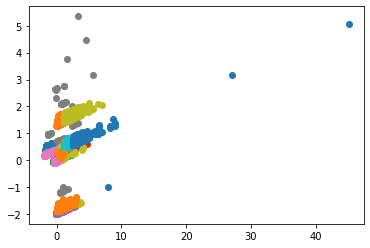

In [40]:
for i in u_labels:
    plt.scatter(result[label == i , 0] , result[label == i , 1] , label = i)